<a href="https://colab.research.google.com/github/Vaisakh-Babu/Exploratory_Data_Analysis-Titanic_Dataset/blob/master/Titanic_Dataset_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis : Titanic Dataset
## By Vaisakh Babu

RMS Titanic was a British passenger liner operated by the White Star Line that sank in the North Atlantic Ocean in the early morning hours of 15 April 1912, after striking an iceberg during her maiden voyage from Southampton to New York City. Of the estimated 2,224 passengers and crew aboard, more than 1,500 died, making the sinking one of modern history's deadliest peacetime commercial marine disasters.[[1]](https://en.wikipedia.org/wiki/RMS_Titanic)

# Import the necessary Libraries and Packages:

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import folium
%matplotlib inline
#from google.colab import drive
#drive.mount('Mydrive')

# Load the Dataset:

In [73]:
train=pd.read_csv('https://github.com/Vaisakh-Babu/Exploratory_Data_Analysis-Titanic_Dataset/raw/master/Dataset.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [74]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Our dataset has 12 columns and 891 records.Some columns have null values in our data. Let's check the percentage of non-null values,

In [75]:
pd.DataFrame(((891-train.isnull().sum())/891)*100 , columns=['Coverage']).T

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Coverage,100.0,100.0,100.0,100.0,100.0,80.13468,100.0,100.0,100.0,100.0,22.895623,99.775533


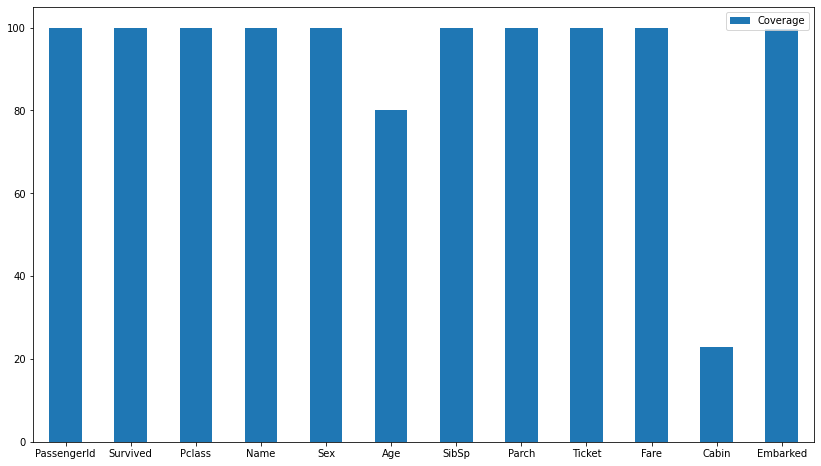

In [76]:
pd.DataFrame(((891-train.isnull().sum())/891)*100 , columns=['Coverage']).plot( kind = 'bar',figsize=(14,8),rot='horizontal')
plt.show()

All the columns except Age, Cabin and Embarked have a 100% coverage. Embarked column can be consider as 100% since its coverage is 99.78% which very closer to 100%. Cabin column has the least coverage, which is 22.9%. And column Age have a coverage of 80.13%.

# Univariate EDA:

In our dataset we have 12 columns.

In [77]:
train.columns.to_list

<bound method IndexOpsMixin.tolist of Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')>




>Our analysis will be mainely based on the columns
1. Survived
2. Pclass
3. Sex
4. Age
5. Embarked
6. Fare

###Categories of passengers
>Passengers are catogorised into three using the column "Pclass"
1. --> 1st Class
2. --> 2nd Class
3. --> 3rd Class


In [78]:
t1 = train.Pclass.value_counts().to_frame().reset_index()
t1

,index,Pclass
0,3,491
1,1,216
2,2,184


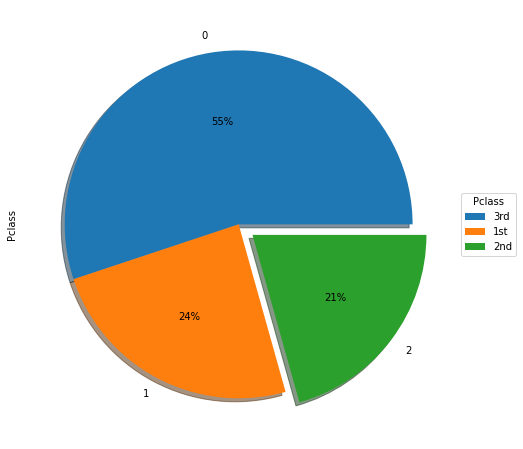

In [79]:
ax = train.Pclass.value_counts().plot(kind = 'pie', rot = 'horizontal', figsize = (8,8),explode = (0, 0, 0.1), shadow=True, labels=t1.index, autopct='%1.0f%%')
ax.legend(['3rd','1st','2nd'], title="Pclass", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1));

We can see that more than half of the passengers(55%) are in 3rd class. 2nd class passengers are the least, that is 21%.

###Gender of Passengers

In [80]:
t2 = train.Sex.value_counts().to_frame().reset_index()
t2

,index,Sex
0,male,577
1,female,314


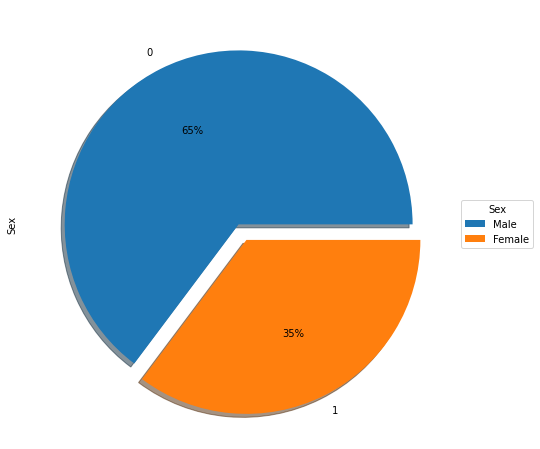

In [81]:
ax = train.Sex.value_counts().plot(kind = 'pie', rot = 'horizontal', figsize = (8,8),explode = (0, 0.1), shadow=True, labels=t2.index, autopct='%1.0f%%')
ax.legend(['Male','Female'],title="Sex", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1));

Around 65% of the passengers are males in our dataset.


###Age Distribution


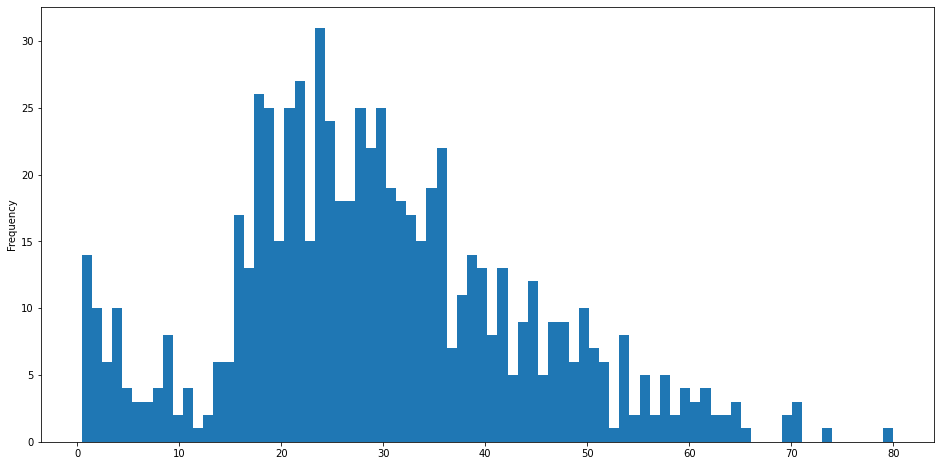

In [82]:
train.Age.plot(kind='hist',figsize=(16,8), bins=80);

## What is the Count of Survived vs Not Survived?

In [83]:
train.groupby('Survived').agg({'PassengerId':'count'})

,PassengerId
Survived,
0,549
1,342


>In the column named Survived, the values will be either 0 or 1. 
0. --> Not Survived
1. --> Survived
In our dataset, we have a survival rate of 342/891 = 0.3838
That is 38.39%.

## Find out the Numerical Columns Basic Statistics:

In [84]:
train.describe(include ='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891,NaN,NaN,NaN,446,257.354,1,223.5,446,668.5,891
Survived,891,NaN,NaN,NaN,0.383838,0.486592,0,0,0,1,1
Pclass,891,NaN,NaN,NaN,2.30864,0.836071,1,2,3,3,3
Name,891,891,"Trout, Mrs. William H (Jessie L)",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,714,NaN,NaN,NaN,29.6991,14.5265,0.42,20.125,28,38,80
SibSp,891,NaN,NaN,NaN,0.523008,1.10274,0,0,0,1,8
Parch,891,NaN,NaN,NaN,0.381594,0.806057,0,0,0,0,6
Ticket,891,681,CA. 2343,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891,NaN,NaN,NaN,32.2042,49.6934,0,7.9104,14.4542,31,512.329


## Visualize Survived vs Not Survived:

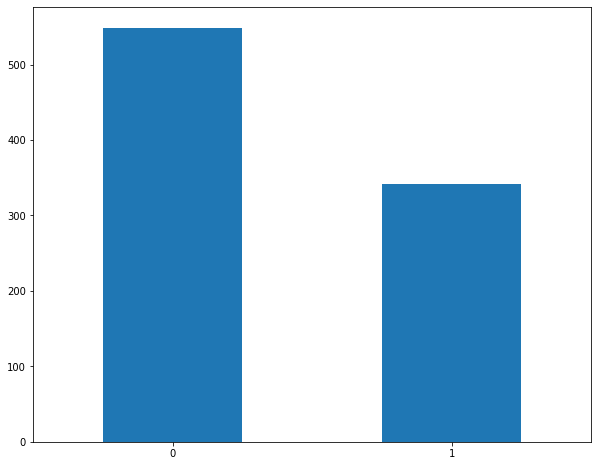

In [85]:
train.Survived.value_counts().plot(kind='bar',figsize=(10,8),rot='horizontal');

There is a 38.39% survival rate.

## Visual EDA for single Categorical Column: "Embarked"

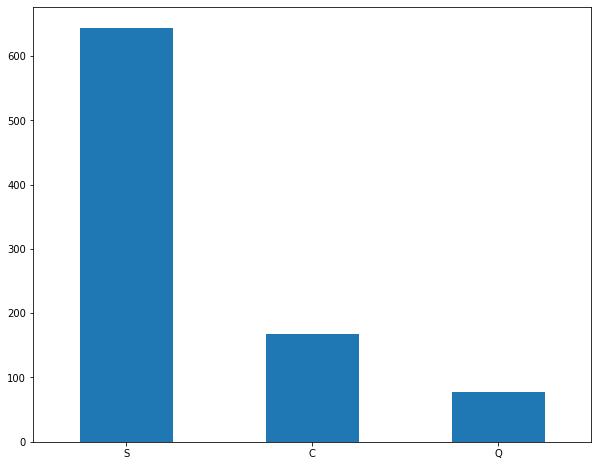

In [86]:
train.Embarked.value_counts().plot(kind='bar',figsize=(10,8),rot ='horizontal');

Most number of people had Embarked from Queenstown(Port of Cobh).

In [87]:
import folium
m = folium.Map(
    location=[41.732500, -49.946889],
    zoom_start=4,
    tiles='Stamen Terrain',
    width=1500, height=1000
)
#C
folium.Marker(
    location=[49.644577,-1.605079],
    popup='Cherbourg'
).add_to(m)
#Q
folium.Marker(
    location=[51.84914,-8.2975265],
    popup='Queenstown' ,
    icon=folium.Icon(color='red')
).add_to(m)
#S
folium.Marker(
    location=[50.8965, -1.3968],
    popup='Southampton'
).add_to(m)
folium.Marker(
    location=[41.732500, -49.946889],
    popup='Spot where Titanic sank in 1912' ,
    icon=folium.Icon(color='green')
).add_to(m)
m

## Visual EDA for single Continuous Column: "Fare" using Distribution Plot

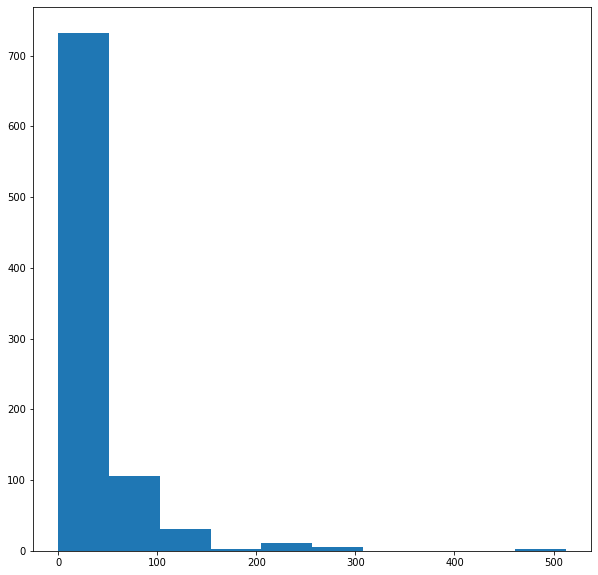

In [88]:
plt.figure(figsize=(10,10))
plt.hist(x = train['Fare']);

Column named Fare will indicate the ticket price. We can see that, most of the fare comes under 100$

In [89]:
print("Ticket fare below 50 :-  " +
      str(train.query('Fare <= 50').shape[0]))
print("Ticket fare between 50 and 100 :-  " +
      str(train.query('Fare > 50 & Fare <= 100').shape[0]))
print("Ticket fare greater than 100 :-  " +
      str(train.query('Fare > 100').shape[0]))

Ticket fare below 50 :-  731
Ticket fare between 50 and 100 :-  107
Ticket fare greater than 100 :-  53


731 passengers paid a ticket fare less than 50$. That is about 84% of the passengers.

## Visual EDA for single Continuous Column: "Fare" using KDE(Kernel Density Estimation) Plot

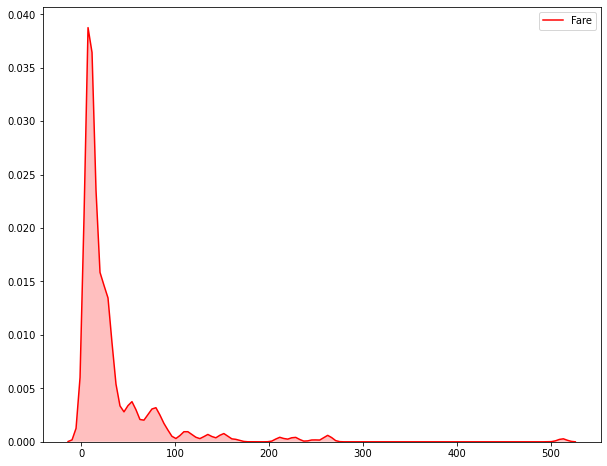

In [90]:
plt.figure(figsize=(10,8))
sns.kdeplot(train['Fare'], shade=True, color="r");

# Bivariate EDA:

##  What is the count of Males and Females Survived and Not Survived in each Class?

We can see the number of survived and not survived for each class by their gender.

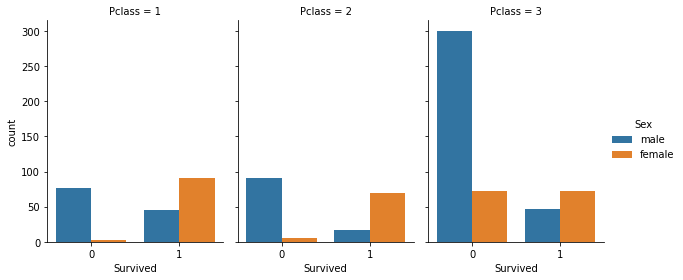

In [91]:
g = sns.catplot(x="Survived", hue="Sex", col="Pclass", data=train, kind="count", height=4, aspect=.7)

The most number of survived passengers are 1st class Females. And the most number of not survived passengers are 3rd class males.
>We can see that, In all the classes 
1. females have the highest count of surviving, and
2. males have the highest count of not surviving


In [92]:
pd.crosstab(train["Survived"] , train['Sex'],margins=True,)

Sex,female,male,All
Survived,,,
0,81,468,549
1,233,109,342
All,314,577,891


From the above table, we can see that 74.20% of females got survived but only 18.90% males survived the sinking of Titanic.
This trend of high survival rate for female and low survival rate for male passengers, is same in all three classes.

## Visualize Survived and Not Survived with respect to the 'Embarked' Column:

Embarked coulumn indicates the port in each passengers boarded the ship. In our dataset, we have three different values in this column: that is, Southampton, Cherbourg and Queenstown.

In [93]:
train.Embarked.value_counts().to_frame()

,Embarked
S,644
C,168
Q,77


We can see that the most number of passengers embarked the journey from Southampton. That is 72.44% of the total number. 

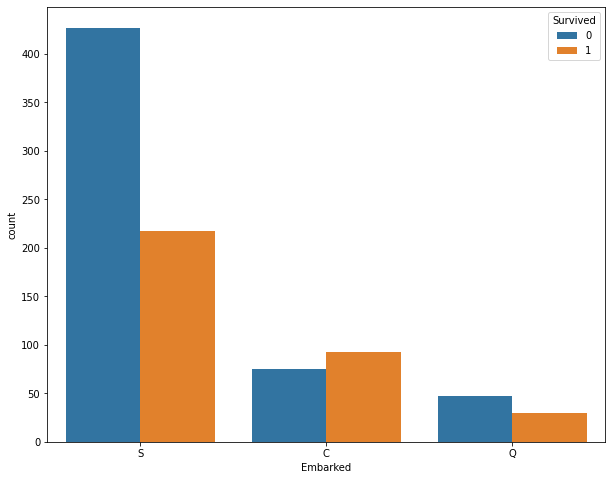

In [94]:
plt.figure(figsize=(10,8))
x = sns.countplot(x="Embarked", hue="Survived", data=train)
plt.show()

Its visible from the graph that the most number of survived and the most number of not survived passengers are boarded from Southampton. Also the least number of survived and the least number of not survived passengers are boarded from Queenstown, which has the least percentage of embarkment(8.66%).

In [95]:
pd.crosstab(train.Embarked , train.Survived, margins=True)

Survived,0,1,All
Embarked,,,
C,75,93,168
Q,47,30,77
S,427,217,644
All,549,340,889


We can also see that Except Queenstown, number of survived is less than number of not survived.

## Plot a Desnity Graph based on Fare and Survival Rate:

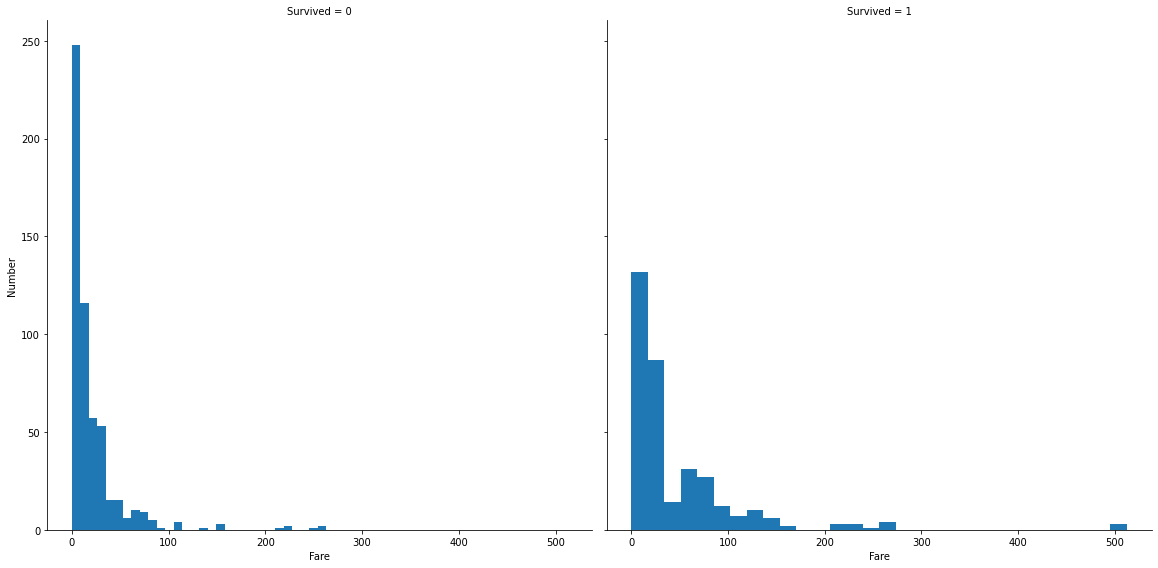

In [96]:
t5 = sns.FacetGrid(train, col='Survived',height=8)
t5.map(plt.hist, 'Fare', bins=30)
t5.set_ylabels('Number');

## Plot a Distplot based on Fare and Survival Rate:

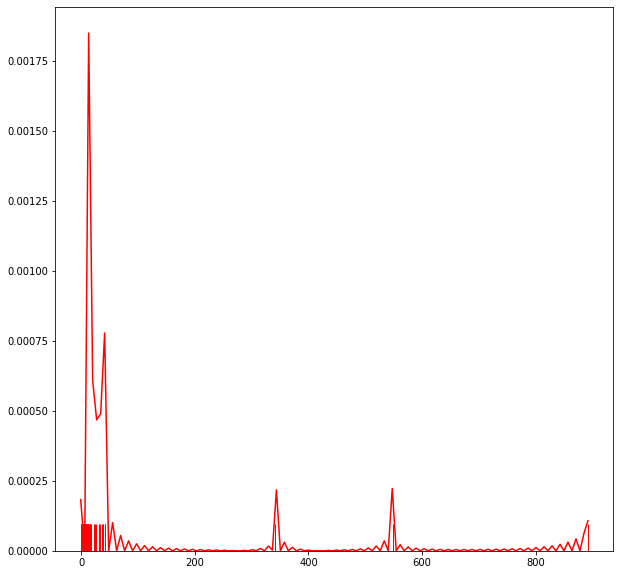

In [97]:
t4=pd.DataFrame(pd.crosstab(train['Survived'] , train['Fare'],margins=True))
plt.figure(figsize=(10,10))
sns.distplot(t4,rug=True,hist=False,color='red',);

## How are "Age" and "Fare" Columns related? Plot a Graph for the same:

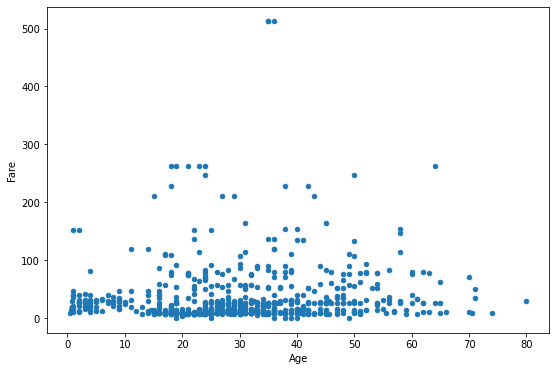

In [98]:
train.plot(x='Age',y='Fare',kind='scatter', figsize = (9,6));

In [99]:
train.query('Fare<50 & Age<50').count()

PassengerId    527
Survived       527
Pclass         527
Name           527
Sex            527
Age            527
SibSp          527
Parch          527
Ticket         527
Fare           527
Cabin           56
Embarked       527
dtype: int64

We can see that most of the passengers who have age less than 50 and have ticket fare less than 50$.

In [100]:
train['Age_bracket']=pd.cut(train['Age'],bins=[0,20,30,40,50,60,70,np.inf],labels=['0-20','20-30','30-40','40-50','50-60','60-70','70+'])
train['Age_bracket'].value_counts(dropna=True).to_frame().sort_index()

,Age_bracket
0-20,179
20-30,230
30-40,155
40-50,86
50-60,42
60-70,17
70+,5


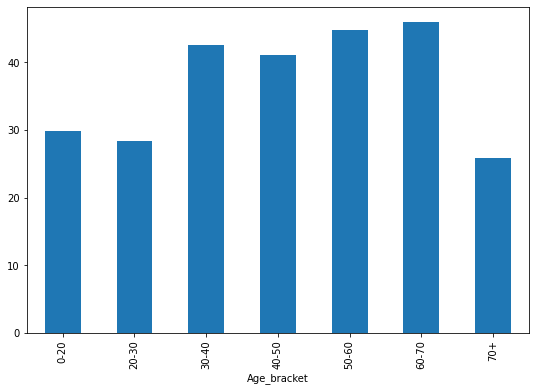

In [101]:
train.groupby('Age_bracket')['Fare'].mean().plot(kind='bar', figsize = (9,6));

The bar graph represents the mean fare for all the age brackets. Passengers within age bracket 60-70 have the highest mean fare and 70+ have the lowest mean fare.

# Multivariate EDA:

## Does Age have an impact on Survival Rate for each Sex and Class group?
We can see the age distribution of passengers and survived with respect to gender.



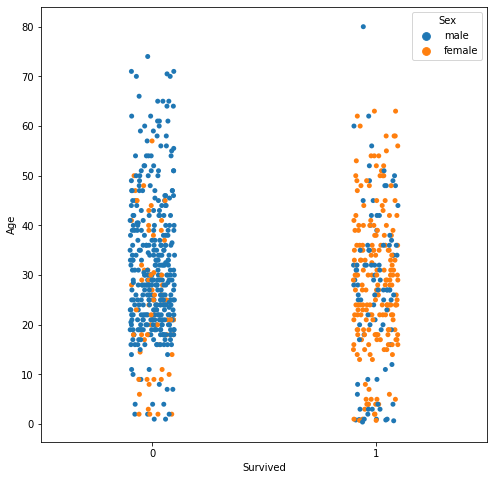

In [102]:
plt.figure(figsize=(8,8))
sns.stripplot(data =train,x='Survived',y='Age',hue='Sex');

It is very clear that Females survived the most and most passengers survived within the age 10 to 40. Passengers who not survived are within the age 15 to 45.
Lets look into it more deeply by adding Class of the passengers in the plot.

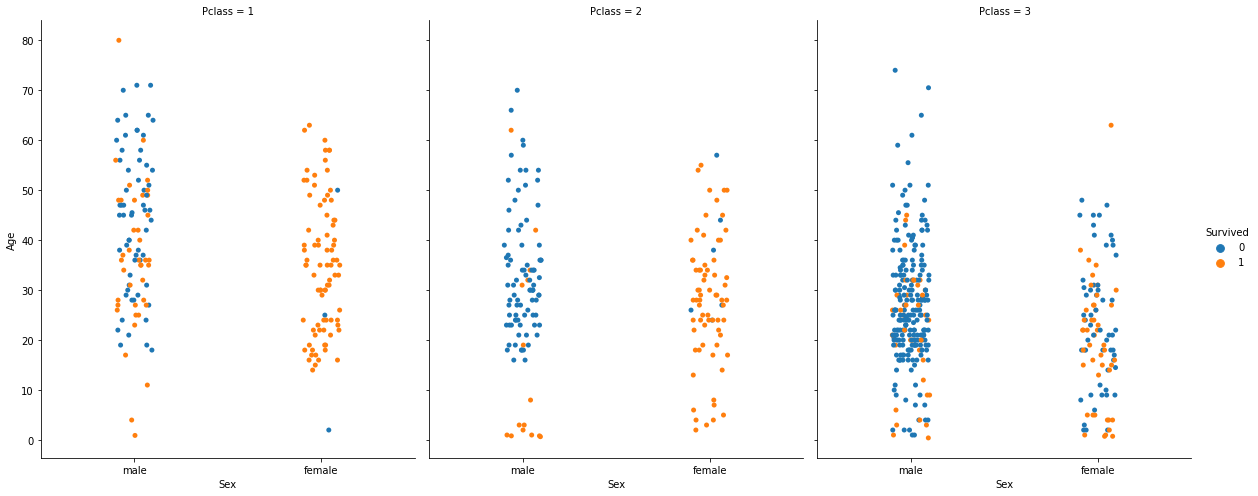

In [103]:
mul = sns.catplot(x="Sex", y="Age", hue="Survived", col="Pclass", data=train, kind="strip", height=7, aspect=.8)

Its getting more evident that females survived the most in each classes. Except in 3rd class, the number of not survived female passengers are negligibly small. 

class 1 --> 3 females not survived

class 2 --> 6 females not survived

class 3 --> 55 females not survived

Age and survival rate has no visible impact on any gender or class.

In [104]:
pd.crosstab([train.Sex, train.Survived], [train.Age_bracket, train.Pclass], margins=True)

Age_bracket     0-20          20-30          30-40  ... 50-60 60-70       70+     All
Pclass             1   2    3     1   2    3     1  ...     3     1  2  3   1  3     
Sex    Survived                                     ...                              
female 0           1   0   23     1   3   16     0  ...     0     0  0  0   0  0   64
       1          13  16   24    20  25   16    24  ...     0     2  0  1   0  0  197
male   0           3   9   61    10  33   83    12  ...     5     9  2  2   2  2  360
       1           4  10   15     9   0   14    13  ...     0     0  1  0   1  0   93
All               21  35  123    40  61  129    49  ...     5    11  3  3   3  2  714

[5 rows x 21 columns]

## Plot a HEATMAP showing the correlations between different features:

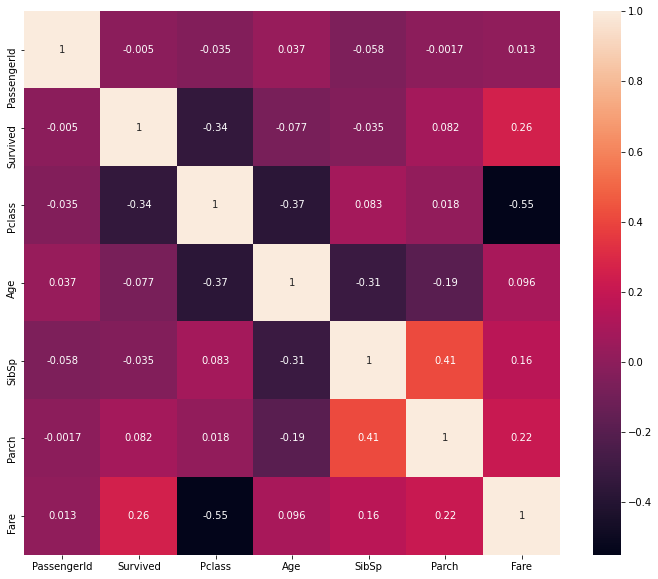

In [105]:
plt.figure(figsize=(12,10))
sns.heatmap(train.corr(),annot=True,)
plt.show()

We can see a high negative correlation between Fare and Pclass, Survived and Pclass.
And positive correlation between Fare and survived.

# Conclusion

>From the preliminary analysis we conclude that,
1. The most number of passengers travelled in 3rd class
2. Even though Males are the majority(65%), Females have the high number of survived passengers.
3. Most of the passengers travelled with a ticket fare of 100$.
4. Majority of passengers boarded from Southampton

When comparing the the survival with respect to gender and class, we can say that females have the highest count of surviving, and
males have the highest count of not surviving.74.20% of females survived while only 18.90% males survived the sinking of Titanic. The most number of survived and the most number of not survived passengers are boarded from Southampton. Also the least number of survived and the least number of not survived passengers are boarded from Queenstown. Most passengers survived within the age 10 to 40. Passengers who not survived are within the age 15 to 45. Female passengers and higher class passengers have the highest surviving rate. 